## Forest Cover notes

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import time

from sklearn.model_selection import train_test_split,  GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold



#### Load the data

We mostly use a reduced set but return to redefine `cover` to be the full set for some models.

In [6]:
cover = pd.read_csv("../../data/covtype.csv")
cover["Cover_Type"] = cover["Cover_Type"].astype("category") 


#### Look at the data

Aside from the target, they are all numerical. But all the `Soil_Type` are indicator binary categorical.

In [7]:
cover.shape

(581012, 55)

In [3]:
cover.dtypes.value_counts()

int64       54
category     1
Name: count, dtype: int64

In [4]:
cover.dtypes

Elevation                                int64
Aspect                                   int64
Slope                                    int64
Horizontal_Distance_To_Hydrology         int64
Vertical_Distance_To_Hydrology           int64
Horizontal_Distance_To_Roadways          int64
Hillshade_9am                            int64
Hillshade_Noon                           int64
Hillshade_3pm                            int64
Horizontal_Distance_To_Fire_Points       int64
Wilderness_Area1                         int64
Wilderness_Area2                         int64
Wilderness_Area3                         int64
Wilderness_Area4                         int64
Soil_Type1                               int64
Soil_Type2                               int64
Soil_Type3                               int64
Soil_Type4                               int64
Soil_Type5                               int64
Soil_Type6                               int64
Soil_Type7                               int64
Soil_Type8   

<Axes: xlabel='Cover_Type'>

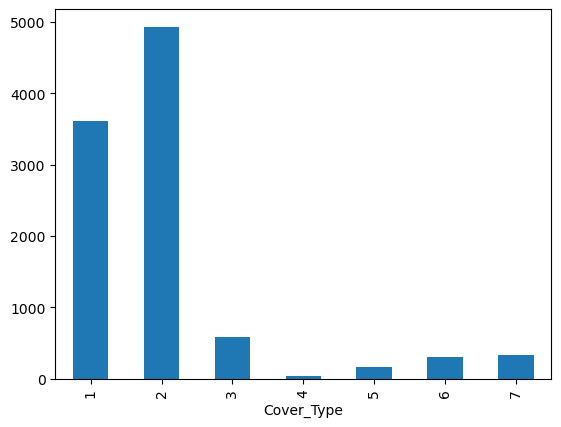

In [4]:
cover['Cover_Type'].value_counts().sort_index().plot(kind='bar')

In [6]:
int_cols = cover.select_dtypes(include=['int64'])
val_counts = [cover[c].nunique() for c in cover.columns ]
list(zip(int_cols, val_counts))

[('Elevation', 1371),
 ('Aspect', 361),
 ('Slope', 52),
 ('Horizontal_Distance_To_Hydrology', 358),
 ('Vertical_Distance_To_Hydrology', 405),
 ('Horizontal_Distance_To_Roadways', 3507),
 ('Hillshade_9am', 173),
 ('Hillshade_Noon', 133),
 ('Hillshade_3pm', 235),
 ('Horizontal_Distance_To_Fire_Points', 2967),
 ('Wilderness_Area1', 2),
 ('Wilderness_Area2', 2),
 ('Wilderness_Area3', 2),
 ('Wilderness_Area4', 2),
 ('Soil_Type1', 2),
 ('Soil_Type2', 2),
 ('Soil_Type3', 2),
 ('Soil_Type4', 2),
 ('Soil_Type5', 2),
 ('Soil_Type6', 2),
 ('Soil_Type7', 2),
 ('Soil_Type8', 2),
 ('Soil_Type9', 2),
 ('Soil_Type10', 2),
 ('Soil_Type11', 2),
 ('Soil_Type12', 2),
 ('Soil_Type13', 2),
 ('Soil_Type14', 2),
 ('Soil_Type15', 1),
 ('Soil_Type16', 2),
 ('Soil_Type17', 2),
 ('Soil_Type18', 2),
 ('Soil_Type19', 2),
 ('Soil_Type20', 2),
 ('Soil_Type21', 2),
 ('Soil_Type22', 2),
 ('Soil_Type23', 2),
 ('Soil_Type24', 2),
 ('Soil_Type25', 2),
 ('Soil_Type26', 2),
 ('Soil_Type27', 2),
 ('Soil_Type28', 2),
 ('Soil_

We see that some of these are all or mostly all zeros. We can eliminate those with `VariableThreshold`. We skip this here.

In [112]:
X_train.iloc[:, 11:].mean()

Wilderness_Area2    0.054133
Wilderness_Area3    0.433867
Wilderness_Area4    0.064800
Soil_Type1          0.004133
Soil_Type2          0.011867
Soil_Type3          0.010933
Soil_Type4          0.020133
Soil_Type5          0.002400
Soil_Type6          0.011200
Soil_Type7          0.000000
Soil_Type8          0.000267
Soil_Type9          0.001333
Soil_Type10         0.058933
Soil_Type11         0.022133
Soil_Type12         0.052400
Soil_Type13         0.027200
Soil_Type14         0.000800
Soil_Type15         0.000000
Soil_Type16         0.004133
Soil_Type17         0.006000
Soil_Type18         0.002133
Soil_Type19         0.007600
Soil_Type20         0.016667
Soil_Type21         0.002133
Soil_Type22         0.060267
Soil_Type23         0.100667
Soil_Type24         0.038667
Soil_Type25         0.001600
Soil_Type26         0.003467
Soil_Type27         0.001333
Soil_Type28         0.001067
Soil_Type29         0.200533
Soil_Type30         0.050667
Soil_Type31         0.045600
Soil_Type32   